Fase 2: Visualización

In [131]:
# Import libraries for data processing
# -----------------------------------------------------------------------
import pandas as pd  # Pandas for data manipulation and analysis in Python.

# Optional libraries (can be removed if not used):
# -----------------------------------------------------------------------
# Import libraries for web scraping and data manipulation
# from bs4 import BeautifulSoup
# import requests

# Import libraries for web browser automation with Selenium
# from selenium import webdriver
# from webdriver_manager.chrome import ChromeDriverManager

# ChromeDriverManager manages the installation of the Chrome driver

# from selenium.webdriver.common.keys import Keys  # Keys is useful for simulating keyboard events in Selenium.
# from selenium.webdriver.support.ui import Select  # Select is used to interact with <select> elements on web pages.

# Import libraries for pausing execution
# -----------------------------------------------------------------------
# from time import sleep  # Sleep is used to pause the program execution for a number of seconds.

# Configurations
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)  # Set a Pandas option to show all columns of a DataFrame.

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)


pd.options.display.max_columns = None

pd.set_option('display.float_format', '{:.2f}'.format)

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
data = pd.read_csv("files/data_merged.csv")

In [133]:
data.head()

,Unnamed: 0,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
0,0,100018,2017,1,3,0,3,1521,152,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552,Married,Aurora,7919.20,Standard,2016,8
1,1,100018,2017,2,2,2,4,1320,132,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552,Married,Aurora,7919.20,Standard,2016,8
2,2,100018,2018,10,6,4,10,3110,311,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552,Married,Aurora,7919.20,Standard,2016,8
3,3,100018,2017,4,4,0,4,924,92,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552,Married,Aurora,7919.20,Standard,2016,8
4,4,100018,2017,5,0,0,0,0,0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552,Married,Aurora,7919.20,Standard,2016,8


1. ¿Cómosedistribuyelacantidaddevuelosreservadospormesduranteelaño?

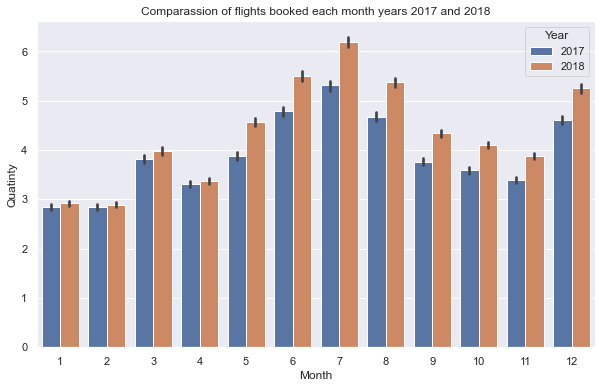

In [134]:
# Configures the figure size
plt.figure(figsize=(10, 6))
# Creates a bar chart
sns.barplot(data=data, x='Month', y='Flights Booked', hue='Year')
# Adds a title to the chart, labels and legend
plt.title('Comparassion of flights booked each month years 2017 and 2018') 
plt.xlabel('Month') 
plt.ylabel('Quatinty') 
plt.legend(title='Year')
# Display the chart
plt.show() 

2. ¿Existeunarelaciónentreladistanciadelosvuelosylospuntosacumuladosporlosclientes?

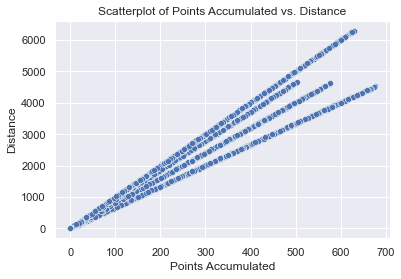

In [135]:
# Gráfico
sns.scatterplot(data["Points Accumulated"],data["Distance"])
plt.title("Scatterplot of Points Accumulated vs. Distance")
plt.xlabel("Points Accumulated")
plt.ylabel("Distance")
plt.show()

plt.show();

Cuálesladistribucióndelosclientesporprovinciaoestado

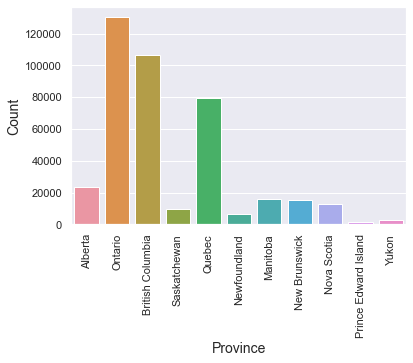

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
sns.countplot(data["Province"])

# Rotate the labels
plt.xticks(rotation=90)

# Increase the font size of labels
plt.xlabel("Province", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Show the plot
plt.show()


Cómosecomparaelsalariopromedioentrelosdiferentesniveleseducativosdelosclientes

''

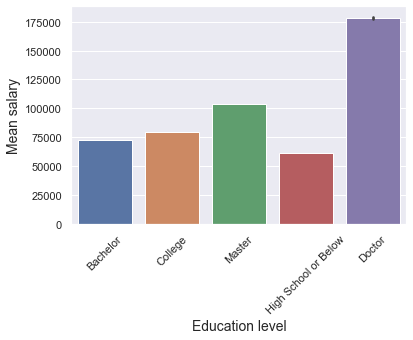

In [137]:
#revisar columna college porque estos valores estaban vacios y la representación puede no ser real/hacer 2 grupos segun notas de ayer
sns.barplot(x = "Education", 
            y = "Salary", 
            data = data
)

plt.xticks(rotation=45)

plt.xlabel("Education level", fontsize=14)
plt.ylabel("Mean salary", fontsize=14)
;

5. ¿Cuáleslaproporcióndeclientescondiferentestiposdetarjetasdefidelidad?

In [138]:
# empezamos preparando los datos para poder hacer el pieplot usando un groupby. En este caso tendremos que contar el número de clientes que tenemos por nivel educativo
df_cards = data.groupby("Loyalty Card")["Loyalty Number"].count().reset_index()
df_cards

,Loyalty Card,Loyalty Number
0,Aurora,83132
1,Nova,136883
2,Star,183745


In [139]:
data["Loyalty Card"].unique()

array(['Aurora', 'Nova', 'Star'], dtype=object)

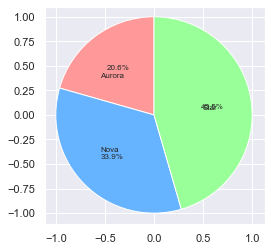

In [140]:
# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie("Loyalty Number", labels= "Loyalty Card",
        data = df_cards, 
        autopct=  '%1.1f%%', 
        colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'],
        wedgeprops = {"linewidth": 1, "edgecolor": "white"},
        textprops={'fontsize': 8},
        labeldistance = 0.5,
        startangle=90,
        frame=True)
plt.show;

6. ¿Cómosedistribuyenlosclientessegúnsuestadocivilygénero?

In [141]:
sns.countplot(x = 'Marital Status',
             y = 'Gender',
             data = data.drop_duplicates(subset=["Loyalty Number"]),
             palette= 'magma',
             hue= 'gender');
           

ValueError: Cannot pass values for both `x` and `y`